In [ ]:
# packages
import os
import sys
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from cartopy.util import add_cyclic_point

# link to self-written packages
sys.path.append("/g/data/if69/cj0591/repos/tc-detection")
from tempestextremes_utils.snap_utils import (ds_assign_lev, 
create_snapshot_sfc_XY, create_snapshot_sfc_RAD,
create_snapshot_pl_XY, create_snapshot_pl_RAD
)

In [ ]:
# view snapshot in RAD grid
def view_rad_snap(da, clevs, cmap):
    cdata, caz = add_cyclic_point(da.values, da.az.values)
    az_rad = np.deg2rad(caz)
    r_vals = da.r.values            
    az_grid, r_grid = np.meshgrid(az_rad, r_vals)

    x = r_grid * np.cos(az_grid)
    y = r_grid * np.sin(az_grid)    

    fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})

    cf = ax.contourf(x, y, cdata, levels=clevs, cmap=cmap, extend='both')
    fig.colorbar(cf, ax=ax, orientation='vertical')
    ax.scatter(0, 0, s=100, color='limegreen')
    plt.title(f"RAD grid (Radial projection)")
    plt.show()
    return

# view snapshot in XY grid
def view_xy_snap(da, clevs, cmap):
    fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})
    cf = ax.contourf(da.x, da.y, da.values, levels=clevs, cmap=cmap, extend='both')
    ax.scatter(0, 0, s=100, color='limegreen')
    cbar = fig.colorbar(cf, ax=ax, orientation='vertical')
    plt.title(f"XY grid (Cartesian projection)")
    plt.show()
    return

In [ ]:
# Extract snapshot (fields centred at cyclone centre)

In [ ]:
txt_dir = "/scratch/if69/cj0591/SANDY_tetracs.txt" # temp ERA5 input files
csv_dir = "/g/data/if69/cj0591/repos/tc-detection/csv/SANDY_tetracs.csv" # TC track csv file

# surface snapshots
snap_sfc_xy_dir = "/scratch/if69/cj0591/SANDY_tetracs_snap_sfc_xy.nc"
snap_sfc_rad_dir = "/scratch/if69/cj0591/SANDY_tetracs_snap_sfc_rad.nc"

# XY grid
create_snapshot_sfc_XY(csv_dir, txt_dir, snap_sfc_xy_dir,
                       variables=['10u', '10v', 'msl', 'sst', 'slhf'],
                       dx=0.5, resx=61,
                       quiet=False)
os.remove(txt_dir)

# RAD grid
create_snapshot_sfc_RAD(csv_dir, txt_dir, snap_sfc_rad_dir,
                        variables=['10u', '10v', 'msl', 'sst', 'slhf'],
                        dx=0.5, resx=61, resa=32,
                        quiet=False)
os.remove(txt_dir)

In [ ]:
# pressure-level snapshots
snap_pl_xy_dir = "/scratch/if69/cj0591/SANDY_tetracs_snap_pl_xy.nc"
snap_pl_rad_dir = "/scratch/if69/cj0591/SANDY_tetracs_snap_pl_rad.nc"

# XY grid
create_snapshot_pl_XY(csv_dir, txt_dir, snap_pl_xy_dir,
                      variables=['u', 'v'],
                      dx=0.5, resx=41,
                      quiet=False)
os.remove(txt_dir)

# RAD grid
create_snapshot_pl_RAD(csv_dir, txt_dir, snap_pl_rad_dir,
                       variables=['u', 'v'],
                       dx=0.5, resx=41, resa=32,
                       quiet=False)
os.remove(txt_dir)

CPU times: user 311 ms, sys: 204 ms, total: 515 ms
Wall time: 2min 55s


In [ ]:
# add "level" coordinate to pressure-level snapshots
ds_pl_xy = xr.open_dataset(snap_pl_xy_dir)
ds_pl_xy = ds_assign_lev(ds_pl_xy)

ds_pl_rad = xr.open_dataset(snap_pl_rad_dir)
ds_pl_rad = ds_assign_lev(ds_pl_rad)

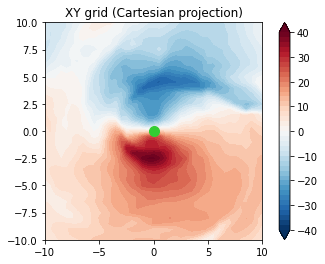

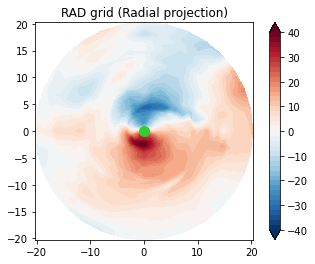

In [19]:
snapshot_idx = 20

view_xy_snap(ds_pl_xy['snap_u'].sel(snapshot=snapshot_idx,level=850),
              np.arange(-40, 42, 2),
             'RdBu_r')

view_rad_snap(ds_pl_rad['snap_u'].sel(snapshot=snapshot_idx,level=850),
              np.arange(-40, 42, 2),
             'RdBu_r')
